In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

--2019-04-28 14:20:48--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.69.128, 2a00:1450:4013:c05::80
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.69.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M  60.6MB/s    in 2.4s    

2019-04-28 14:20:51 (60.6 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip

--2019-04-28 14:20:54--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.119.128, 2a00:1450:4013:c04::80
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.119.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘/tmp/validation-horse-or-human.zip’

/tmp/validation-hor 100%[===================>]  10.95M  27.4MB/s    in 0.4s    

2019-04-28 14:20:54 (27.4 MB/s) - ‘/tmp/validation-horse-or-human.zip’ saved [11480187/11480187]



The following python code will use the OS library to use Operating System libraries, giving you access to the file system, and the zipfile library allowing you to unzip the data. 

In [0]:
import os
import zipfile

# Unzipping training data.
local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')

# Unzipping validation data.
local_zip = '/tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/validation-horse-or-human')

zip_ref.close()

The contents of the .zip are extracted to the base directory `/tmp/horse-or-human`, which in turn each contain `horses` and `humans` subdirectories.

In short: The training set is the data that is used to tell the neural network model that 'this is what a horse looks like', 'this is what a human looks like' etc. 

One thing to pay attention to in this sample: We do not explicitly label the images as horses or humans. If you remember with the handwriting example earlier, we had labelled 'this is a 1', 'this is a 7' etc.  Later you'll see something called an ImageGenerator being used -- and this is coded to read images from subdirectories, and automatically label them from the name of that subdirectory. So, for example, you will have a 'training' directory containing a 'horses' directory and a 'humans' one. ImageGenerator will label the images appropriately for you, reducing a coding step. 

Let's define each of these directories:

In [0]:
# Directory with our training horse pictures.
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')

# Directory with our training human pictures.
train_human_dir = os.path.join('/tmp/horse-or-human/humans')

# Directory with our validation horse pictures.
validation_horse_dir = os.path.join('/tmp/validation-horse-or-human/horses')

# Directory with our validation human pictures.
validation_human_dir = os.path.join('/tmp/validation-horse-or-human/humans')

Now, let's see what the filenames look like in the `horses` and `humans` training directories:

In [5]:
# Printing the first 10 names of each of our four folders.

train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

validation_horse_hames = os.listdir(validation_horse_dir)
print(validation_horse_hames[:10])

validation_human_names = os.listdir(validation_human_dir)
print(validation_human_names[:10])

['horse16-6.png', 'horse11-3.png', 'horse21-7.png', 'horse16-4.png', 'horse29-9.png', 'horse50-9.png', 'horse08-9.png', 'horse39-4.png', 'horse29-2.png', 'horse10-8.png']
['human10-08.png', 'human07-02.png', 'human06-22.png', 'human08-28.png', 'human17-14.png', 'human06-02.png', 'human17-23.png', 'human16-04.png', 'human08-04.png', 'human16-09.png']
['horse5-303.png', 'horse4-188.png', 'horse4-345.png', 'horse3-171.png', 'horse3-011.png', 'horse6-345.png', 'horse3-440.png', 'horse4-530.png', 'horse3-541.png', 'horse2-582.png']
['valhuman01-05.png', 'valhuman05-13.png', 'valhuman03-10.png', 'valhuman03-13.png', 'valhuman02-17.png', 'valhuman04-02.png', 'valhuman01-22.png', 'valhuman05-03.png', 'valhuman02-16.png', 'valhuman01-10.png']


Let's find out the total number of horse and human images in the directories:

In [6]:
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))
print('total validation horse images:', len(os.listdir(validation_horse_dir)))
print('total validation human images:', len(os.listdir(validation_human_dir)))

total training horse images: 500
total training human images: 527
total validation horse images: 128
total validation human images: 128


Now let's take a look at a few pictures to get a better sense of what they look like. First, configure the matplot parameters:

In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll create a four image x for image plot.
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

Now, display a batch of 8 horse and 8 human pictures. You can rerun the cell to see a fresh batch each time:

48


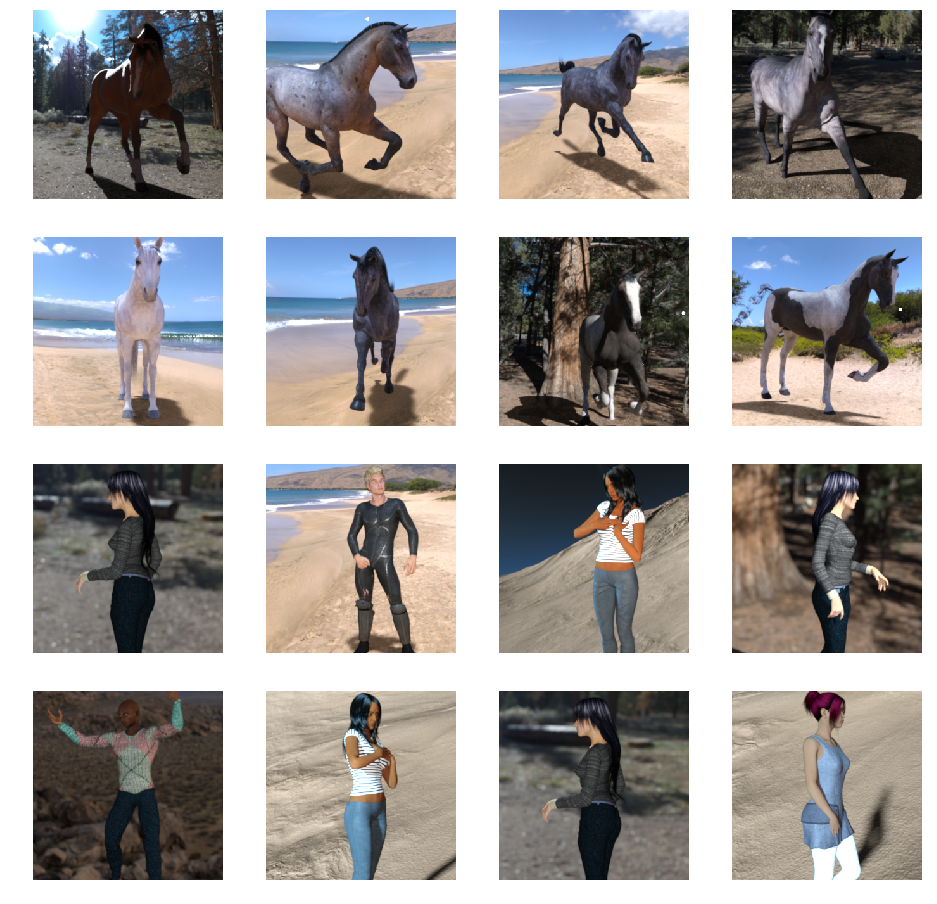

In [14]:
# Setting up matplotlib fig, and size it to fit 4x4 pics.

# Getting current figure.
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8

# Getting eight horse pictures.
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                          for fname in train_horse_names[pic_index-8:pic_index]]

# Getting eight human pictures.
next_human_pix = [os.path.join(train_human_dir, fname) 
                          for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  
  # Setting up the subplots. Subplot indices start at 1.
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path) # np.array.
  plt.imshow(img)

plt.show()


## Building a Small Model from Scratch

But before we continue, let's start defining the model:

Step 1 will be to import tensorflow.

In [0]:
import tensorflow as tf

We then add convolutional layers as in the previous example, and flatten the final result to feed into the densely connected layers.

Finally we add the densely connected layers. 

Note that because we are facing a two-class classification problem, i.e. a *binary classification problem*, we will end our network with a [*sigmoid* activation](https://wikipedia.org/wiki/Sigmoid_function), so that the output of our network will be a single scalar between 0 and 1, encoding the probability that the current image is class 1 (as opposed to class 0).

In [0]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

The model.summary() method call prints a summary of the NN 

In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 33, 33, 64)        36928     
__________

The "output shape" column shows how the size of your feature map evolves in each successive layer. The convolution layers reduce the size of the feature maps by a bit due to padding, and each pooling layer halves the dimensions.

Next, we'll configure the specifications for model training. We will train our model with the `binary_crossentropy` loss, because it's a binary classification problem and our final activation is a sigmoid. (For a refresher on loss metrics, see the [Machine Learning Crash Course](https://developers.google.com/machine-learning/crash-course/descending-into-ml/video-lecture).)

In [0]:
model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['acc'])

### Data Preprocessing

Let's set up data generators that will read pictures in our source folders, convert them to `float32` tensors, and feed them (with their labels) to our network. We'll have one generator for the training images and one for the validation images. Our generators will yield batches of images of size 300x300 and their labels (binary).

As you may already know, data that goes into neural networks should usually be normalized in some way to make it more amenable to processing by the network. (It is uncommon to feed raw pixels into a convnet.) In our case, we will preprocess our images by normalizing the pixel values to be in the `[0, 1]` range (originally all values are in the `[0, 255]` range).

In Keras this can be done via the `keras.preprocessing.image.ImageDataGenerator` class using the `rescale` parameter. This `ImageDataGenerator` class allows you to instantiate generators of augmented image batches (and their labels) via `.flow(data, labels)` or `.flow_from_directory(directory)`. These generators can then be used with the Keras model methods that accept data generators as inputs: `fit_generator`, `evaluate_generator`, and `predict_generator`.

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All image pixels will be divided by 255 to fit in the range from 0 to 1.
training_data_generator = ImageDataGenerator(rescale=1/255)
validation_data_generator = ImageDataGenerator(rescale=1/255)

# Setting up our training data generator so that it can flow (i.e. "load") 
# training images in batches of 128 through the network when we use the fit 
# generator method.
training_data_generator = training_data_generator.flow_from_directory(
        '/tmp/horse-or-human/',  # This is the source directory for training images.
        target_size=(300, 300),  # All images will be resized to 300x300.
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels.
        class_mode='binary')

# Setting up our validation data generator so that it can flow (i.e. "load") 
# validation images in batches of 128 through the network when we use the fit 
# generator method.
validation_data_generator = validation_data_generator.flow_from_directory(
        '/tmp/validation-horse-or-human/',  # This is the source directory for validation images.
        target_size=(300, 300),  # All images will be resized to 300x300.
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels.
        class_mode='binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


### Training
Let's train for 15 epochs -- this may take a few minutes to run.

Do note the values per epoch.

The Loss and Accuracy are a great indication of progress of training. It's making a guess as to the classification of the training data, and then measuring it against the known label, calculating the result. Accuracy is the portion of correct guesses. 

In [23]:
history = model.fit_generator(
      training_data_generator,
      steps_per_epoch=8,
      epochs=15,
      verbose=1,
      validation_data = validation_data_generator,
      validation_steps=8)

Instructions for updating:
Use tf.cast instead.
Epoch 1/15
9/9 [==============================] - 10s 1s/step - loss: 0.7208 - acc: 0.5336 - val_loss: 0.6437 - val_acc: 0.8438
Epoch 2/15
9/9 [==============================] - 8s 876ms/step - loss: 0.5353 - acc: 0.8101 - val_loss: 0.5595 - val_acc: 0.7891
Epoch 3/15
9/9 [==============================] - 7s 804ms/step - loss: 0.1990 - acc: 0.9056 - val_loss: 0.8137 - val_acc: 0.8398
Epoch 4/15
9/9 [==============================] - 7s 760ms/step - loss: 0.0849 - acc: 0.9708 - val_loss: 1.6959 - val_acc: 0.8125
Epoch 5/15
9/9 [==============================] - 7s 754ms/step - loss: 0.0766 - acc: 0.9708 - val_loss: 1.9387 - val_acc: 0.7695
Epoch 6/15
9/9 [==============================] - 7s 756ms/step - loss: 0.0434 - acc: 0.9825 - val_loss: 1.5686 - val_acc: 0.8320
Epoch 7/15
9/9 [==============================] - 7s 766ms/step - loss: 0.1098 - acc: 0.9455 - val_loss: 1.1702 - val_acc: 0.8320
Epoch 8/15
9/9 [============================

###Running the Model

Let's now take a look at actually running a prediction using the model. This code will allow you to choose 1 or more files from your file system, it will then upload them, and run them through the model, giving an indication of whether the object is a horse or a human.

In [0]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

# Getting files from the file system using google collab.
uploaded = files.upload()

for file_name in uploaded.keys():
 
  # Building path to image in the file system.
  path = '/content/' + file_name
  
  # Loading image.
  img = image.load_img(path, target_size=(300, 300)) # PIL image.
  
  # Transforming PIL image to numpy array.
  x = image.img_to_array(img)
  
  # Increasing its dimensions (to 4D) to fit in the 'predict' method.
  x = np.expand_dims(x, axis=0)

  # Making predictions.
  predictions = model.predict(images, batch_size=10)
  
  # Getting the first prediction.
  print(predictions[0])
  
  # Displaying result.
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")
 